Saving dataset.csv to dataset (5).csv

 File 'dataset (5).csv' uploaded successfully!

Dataset Loaded Successfully
   Heart_Rate_Variability  Body_Temperature  Movement_During_Sleep  \
0               79.934283         37.199678               1.324822   
1               67.234714         36.962317               1.855481   
2               82.953771         36.529815               1.207580   
3              100.460597         36.176532               1.692038   
4               65.316933         36.849112               0.106385   

   Sleep_Duration_Hours  Sleep_Quality_Score  Caffeine_Intake_mg  \
0              4.638289                  1.0          107.624032   
1              6.209422                  1.0          104.658589   
2              6.879592                 10.0            0.000000   
3             10.331531                  1.0          116.990981   
4              8.334830                  1.0          223.282908   

   Stress_Level  Bedtime_Consistency  Light_Exposure_ho

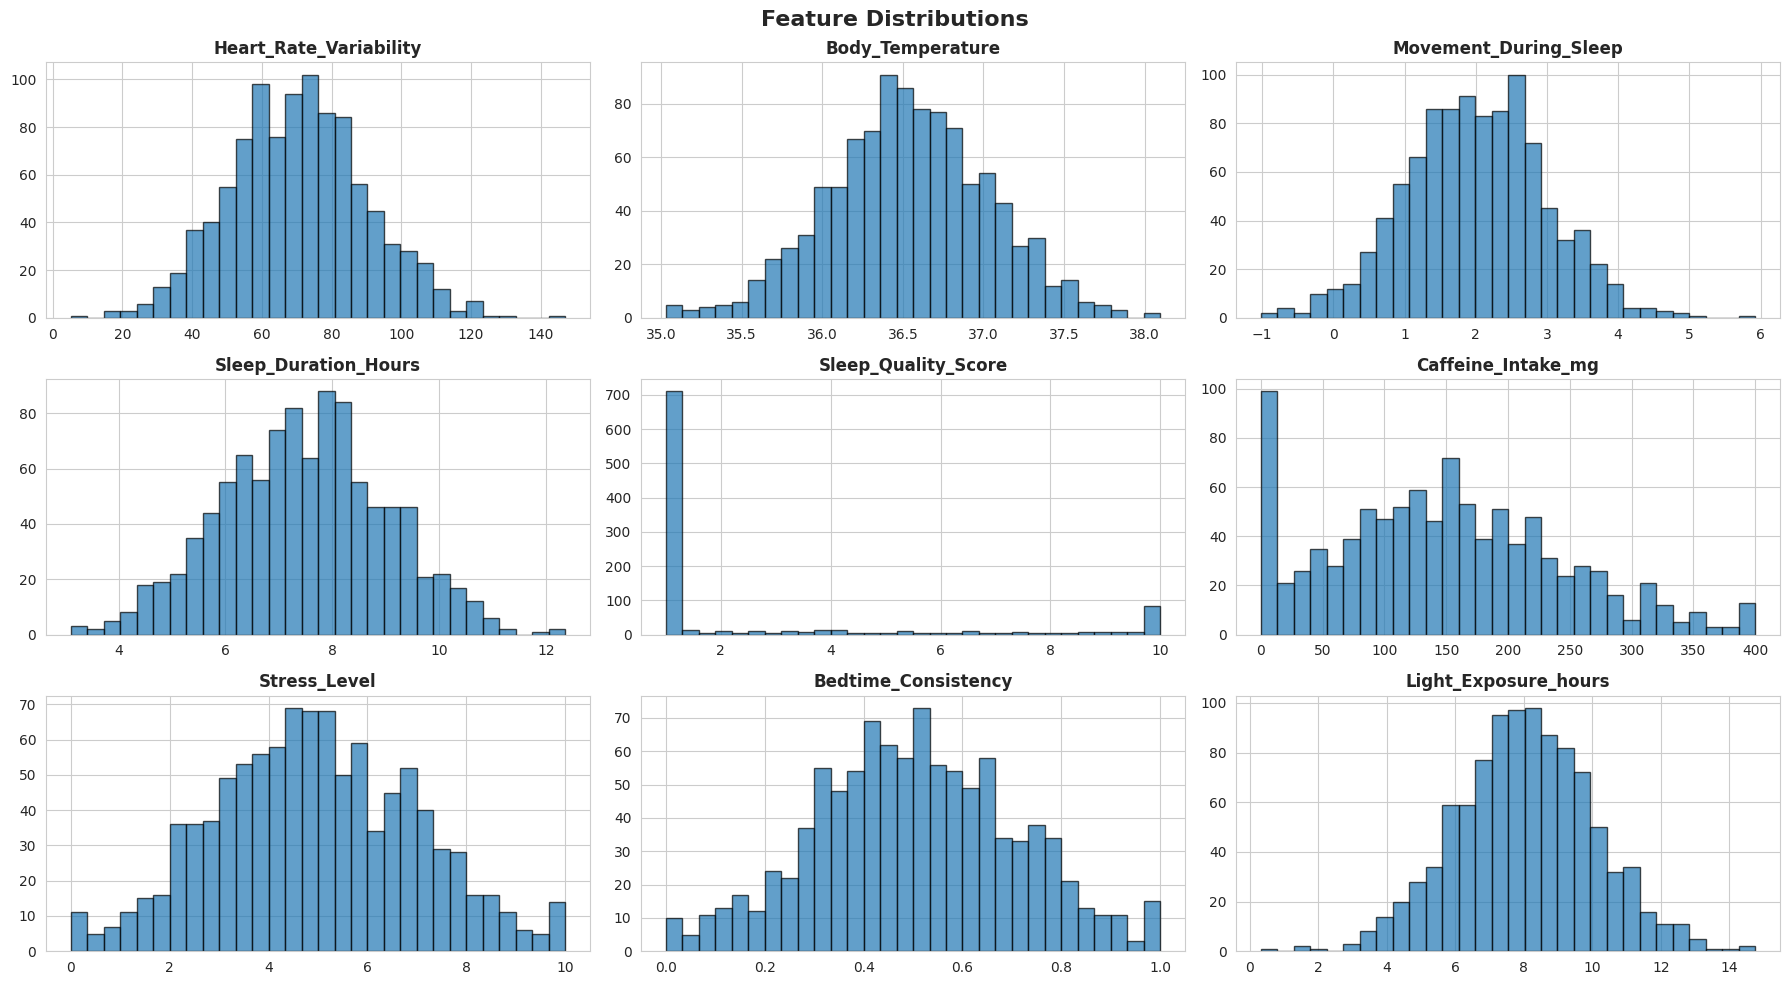

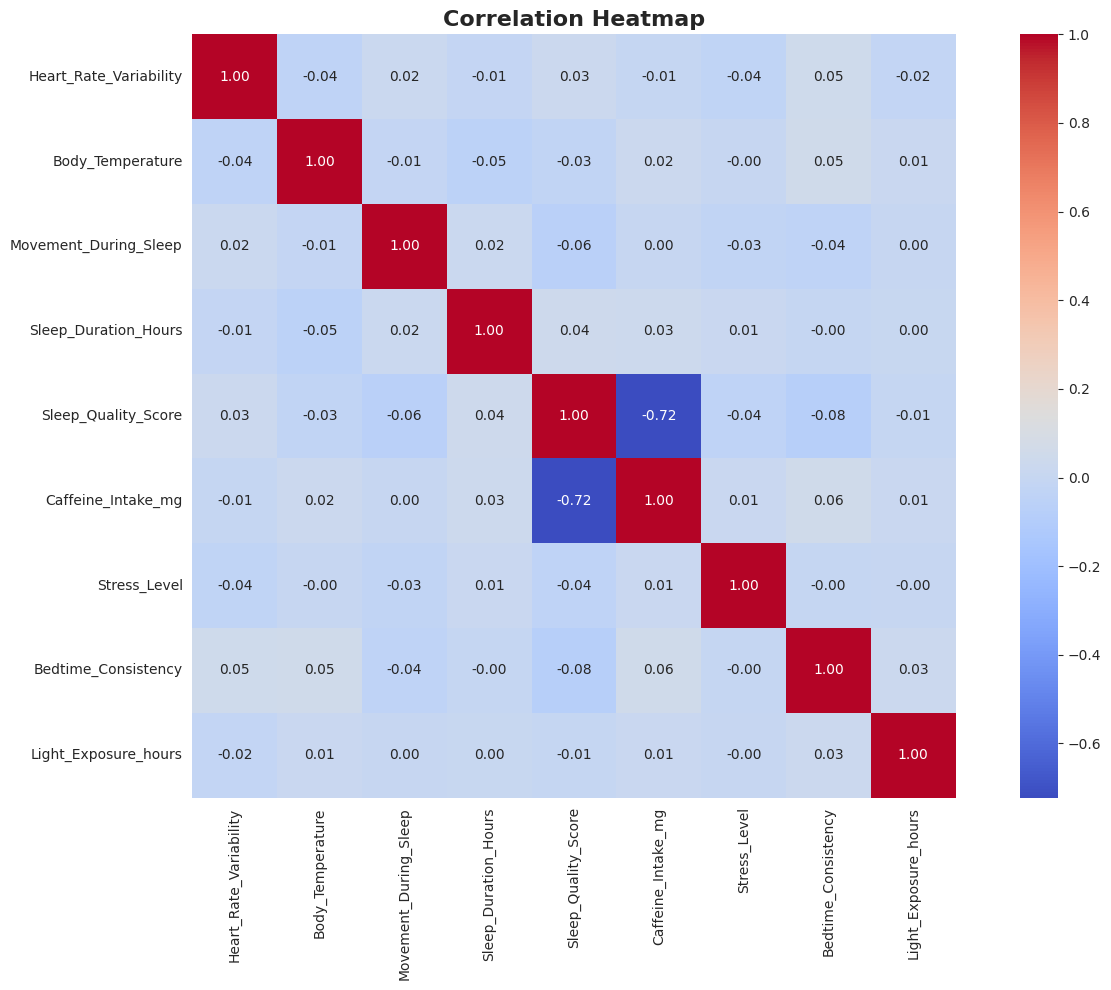


Train shape: (800, 8), Test shape: (200, 8)

Training Linear Regression...

Training Ridge Regression...

Training Random Forest...

Training XGBoost...

Training KNN...

Training SVR...

Training Gradient Boosting...

================ MODEL COMPARISON TABLE ================
            Model  Train R²  Test R²  Train RMSE  Test RMSE  Train MAE  Test MAE  CV R² Mean  CV R² Std
Gradient Boosting  0.999419 0.996447    0.071978   0.175773   0.037775  0.083064    0.993210   0.001837
          XGBoost  1.000000 0.994900    0.001110   0.210591   0.000705  0.092022    0.992413   0.000899
    Random Forest  0.998703 0.993957    0.107518   0.229234   0.044907  0.096712    0.988978   0.003036
              SVR  0.807141 0.797105    1.310983   1.328248   0.750578  0.822866    0.720261   0.034763
              KNN  0.807637 0.757448    1.309294   1.452266   0.694635  0.778954    0.671932   0.037249
Linear Regression  0.528213 0.547694    2.050452   1.983170   1.707641  1.665970    0.514253   0.03

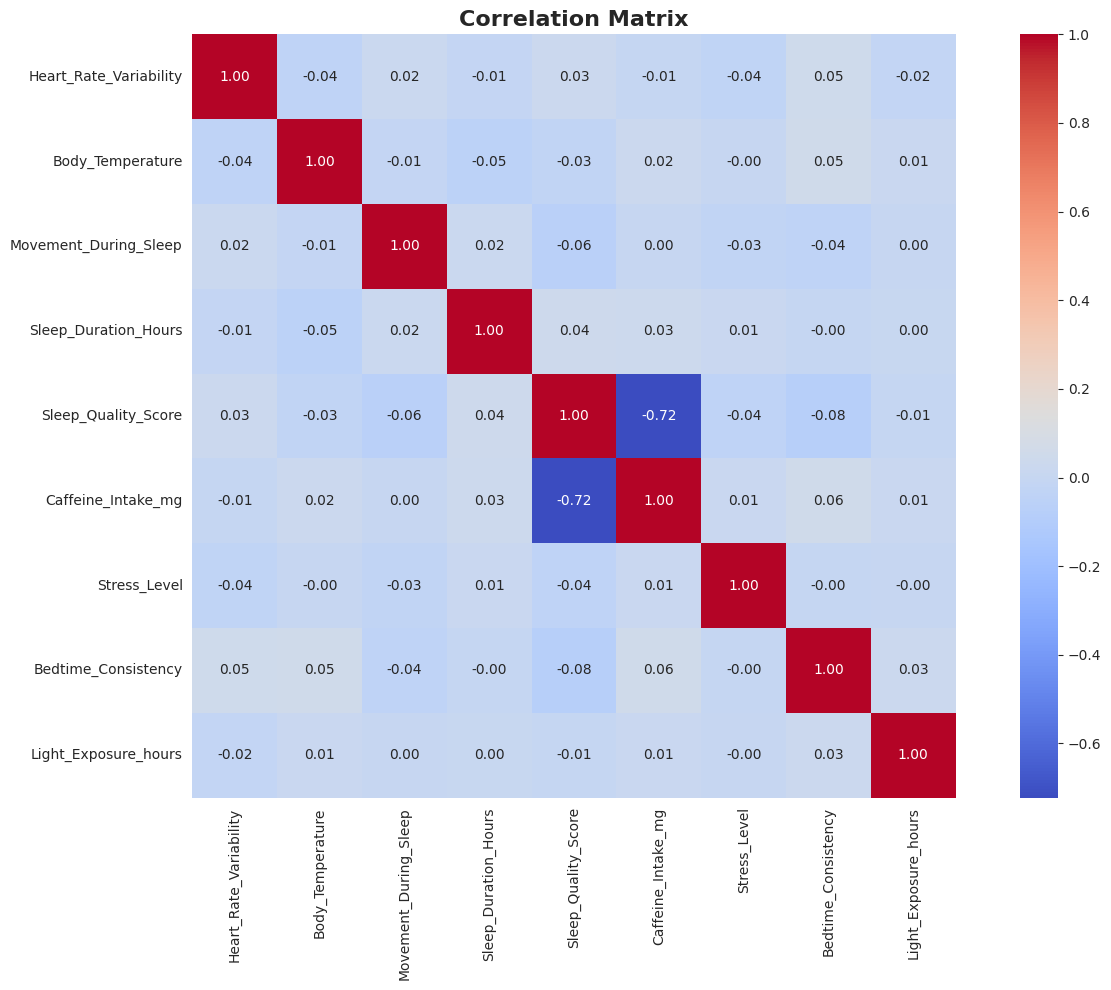


------------------------------------------------------------------------------------------



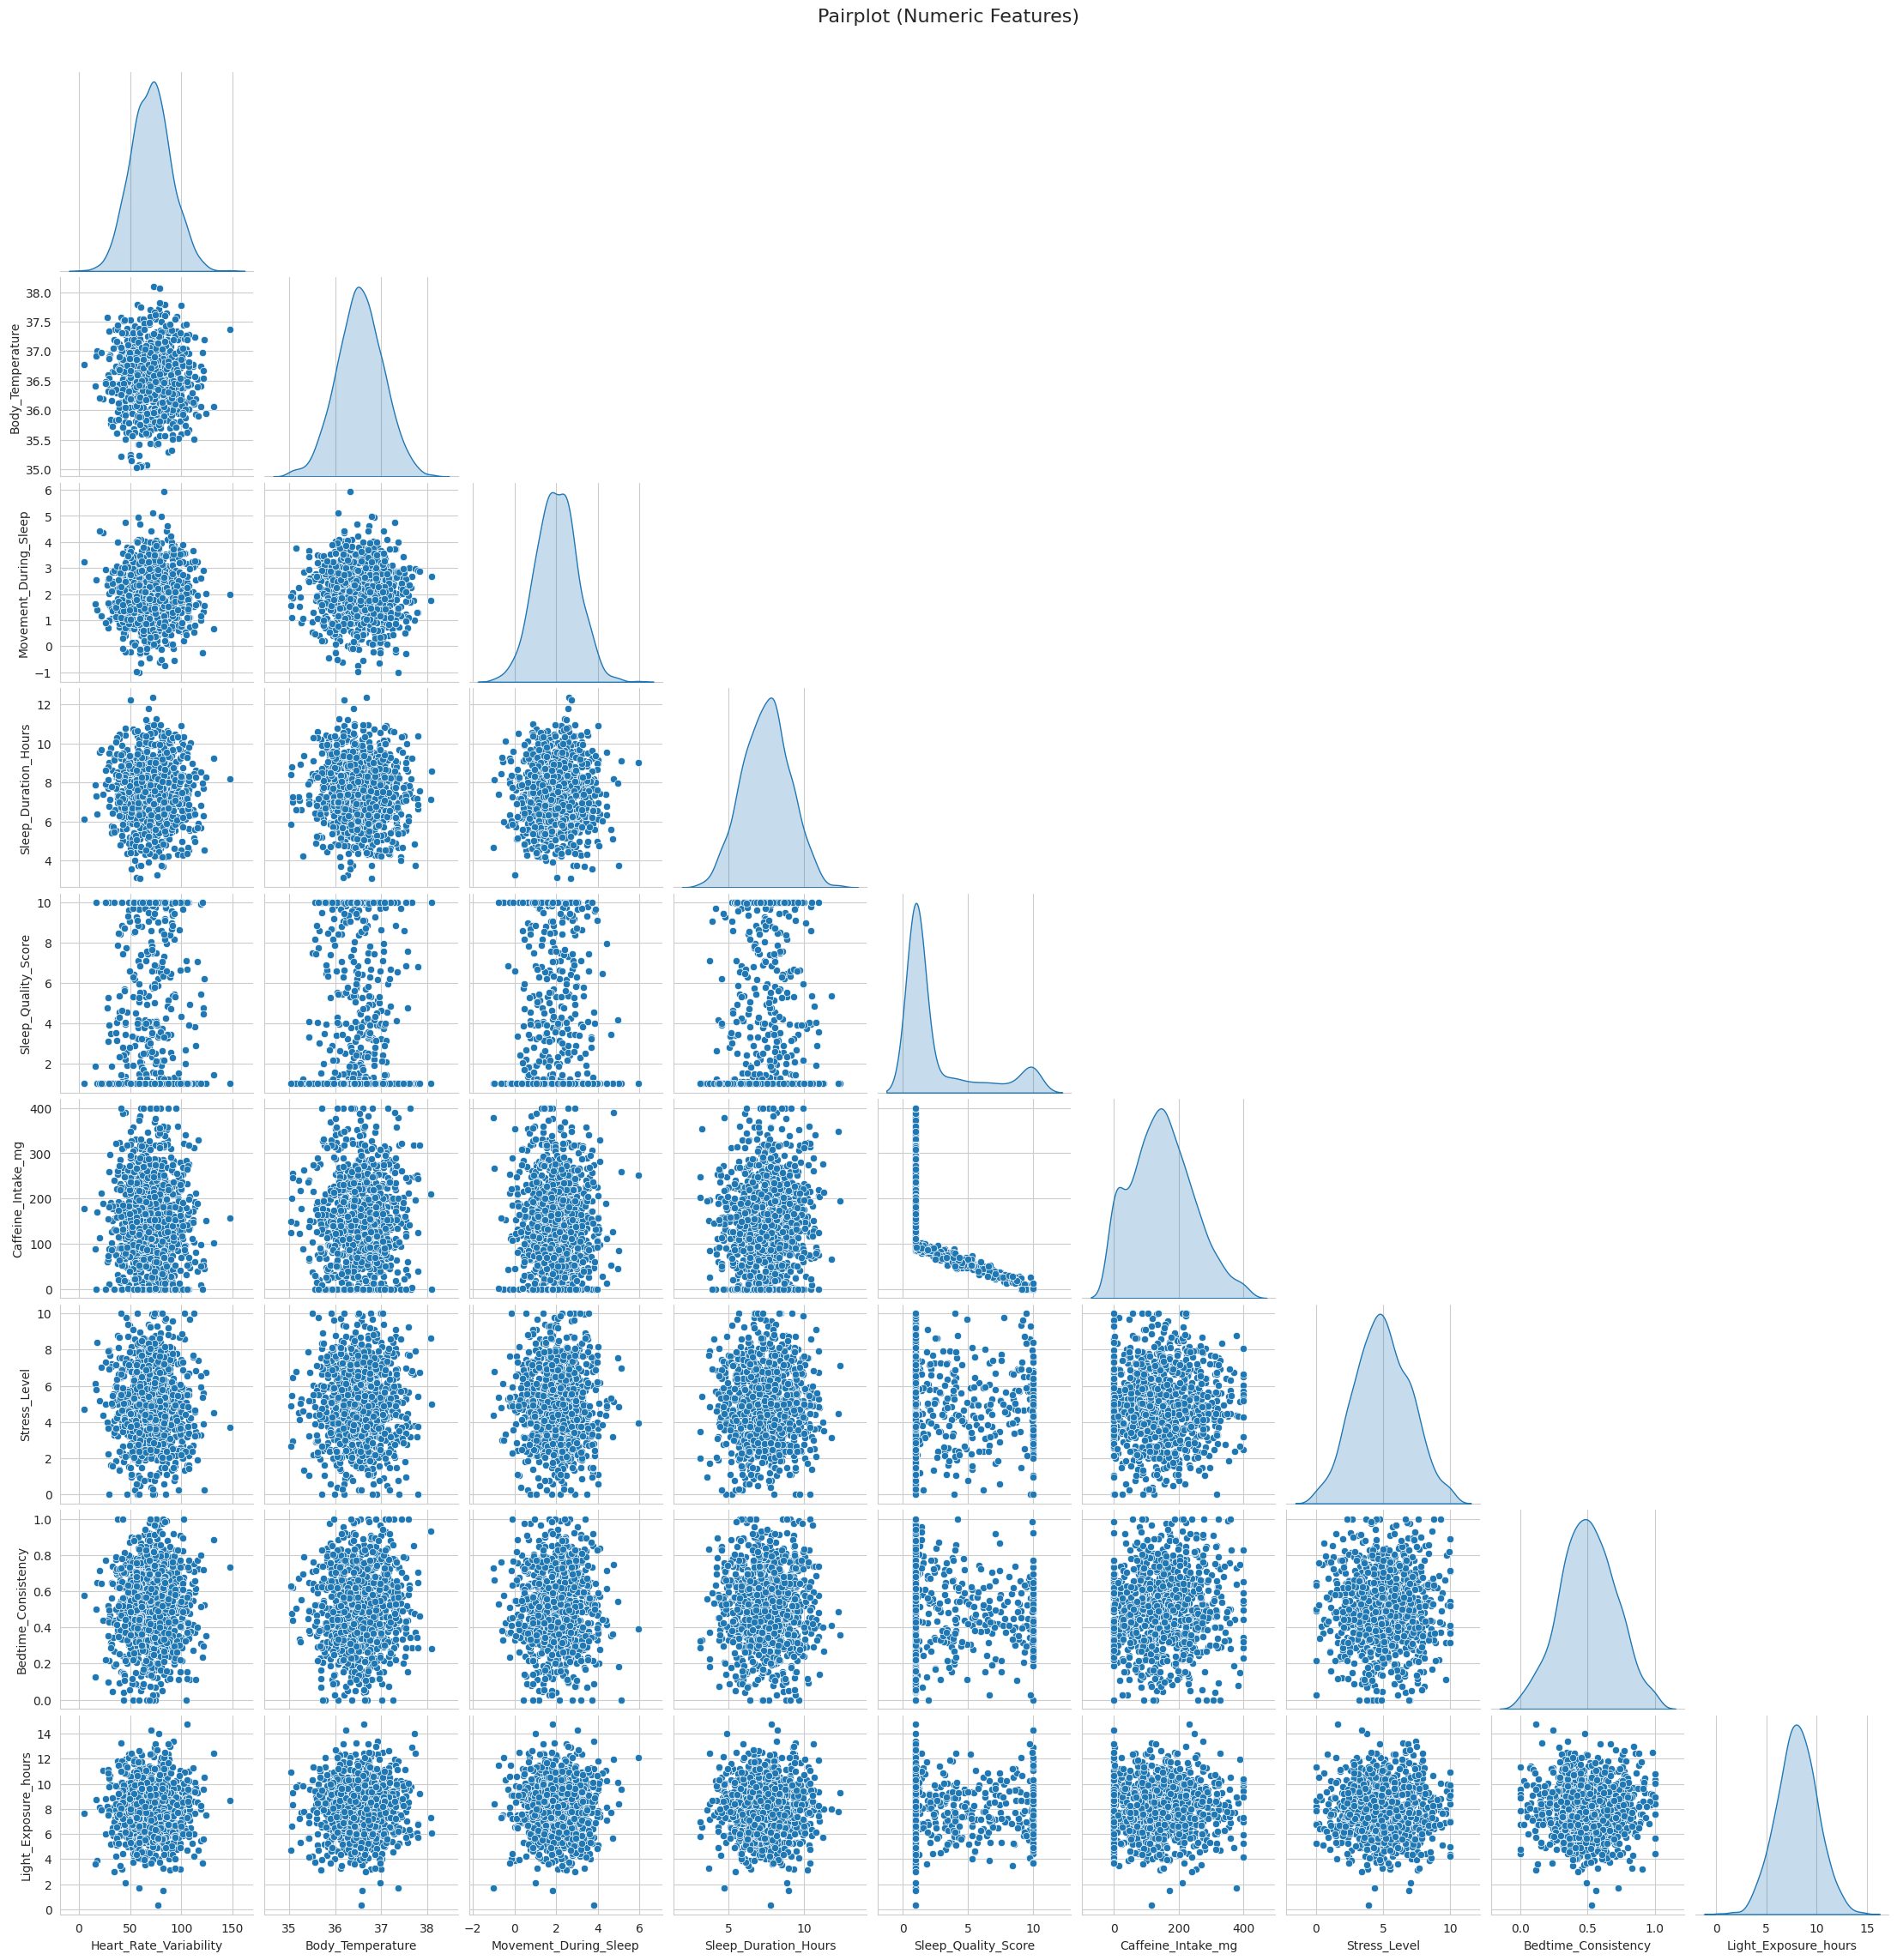


------------------------------------------------------------------------------------------



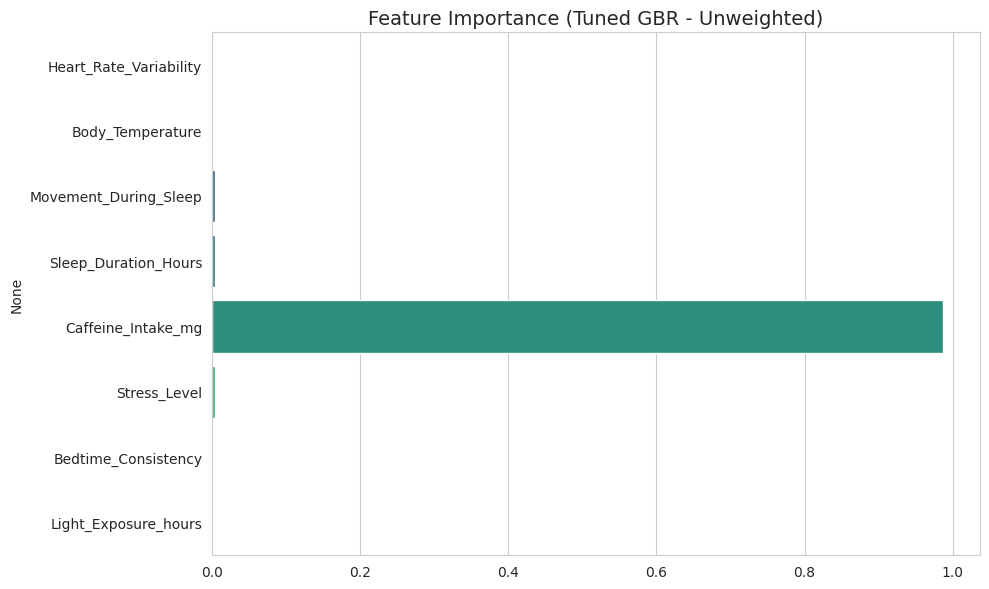


------------------------------------------------------------------------------------------



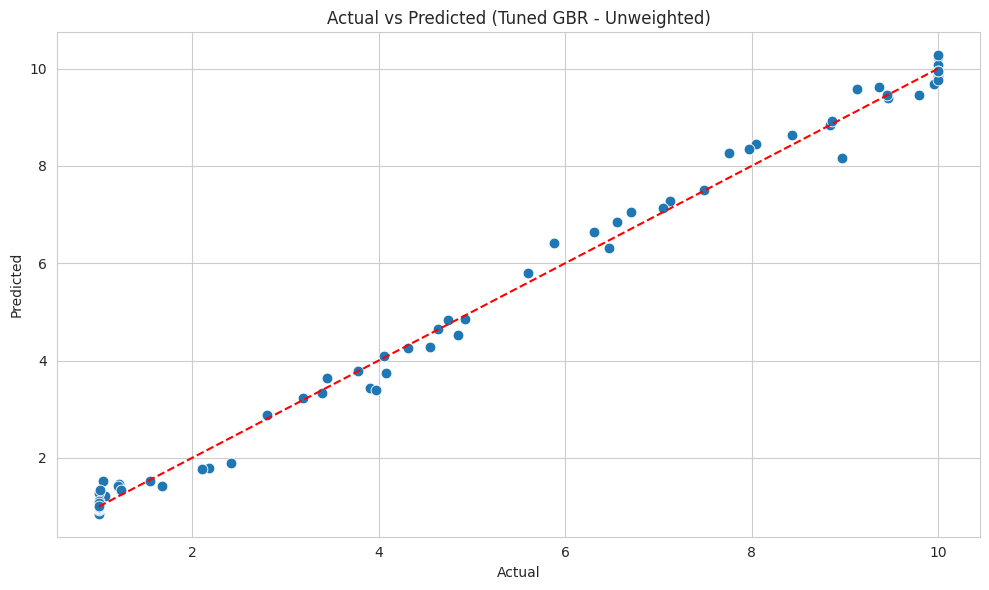


------------------------------------------------------------------------------------------



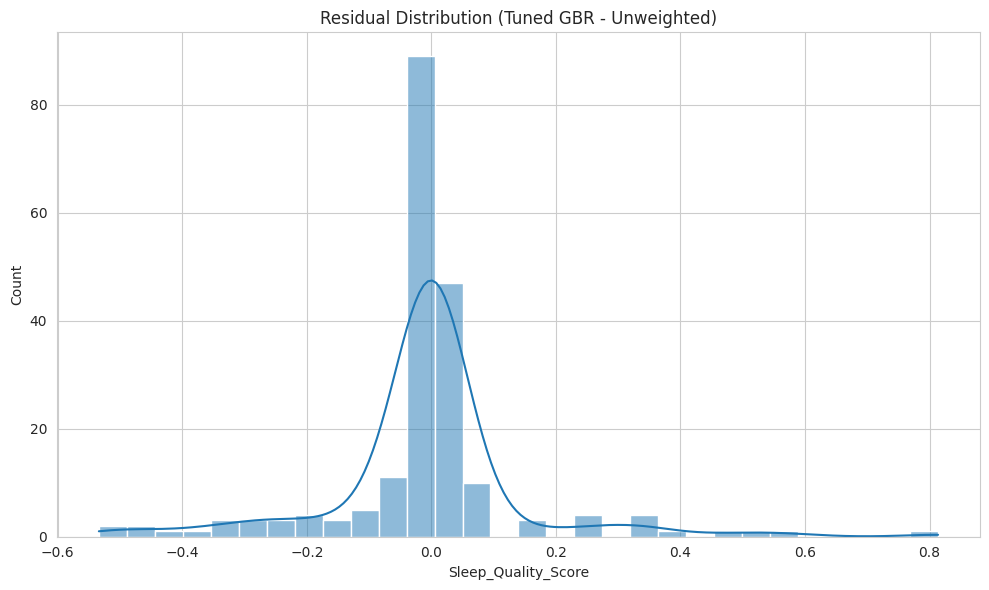


------------------------------------------------------------------------------------------



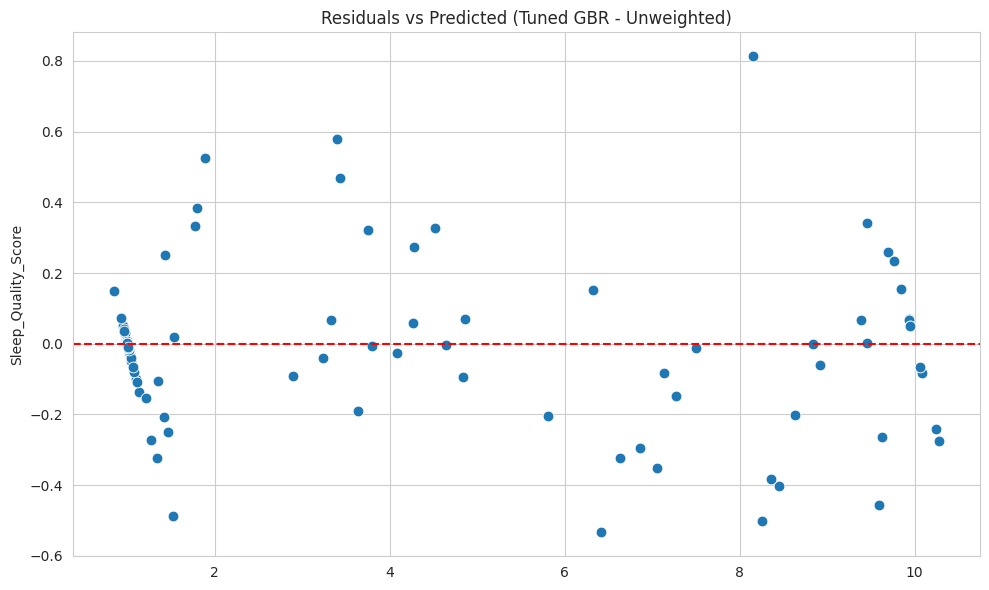


------------------------------------------------------------------------------------------



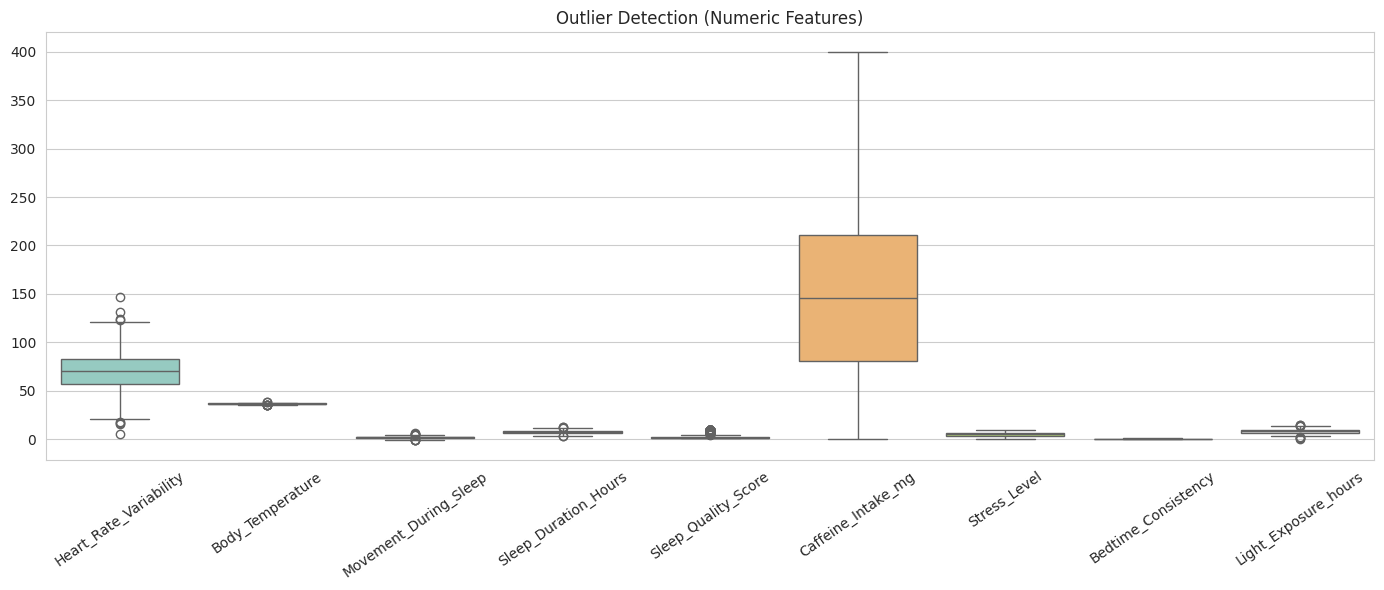


------------------------------------------------------------------------------------------


================ PERMUTATION IMPORTANCE (VOTING ENSEMBLE) ================

Top Features (Permutation Importance - Voting):

Caffeine_Intake_mg        1.981211
Sleep_Duration_Hours      0.005554
Movement_During_Sleep     0.005255
Stress_Level              0.002994
Heart_Rate_Variability    0.000064
Bedtime_Consistency       0.000055
Light_Exposure_hours      0.000019
Body_Temperature         -0.000120
dtype: float64


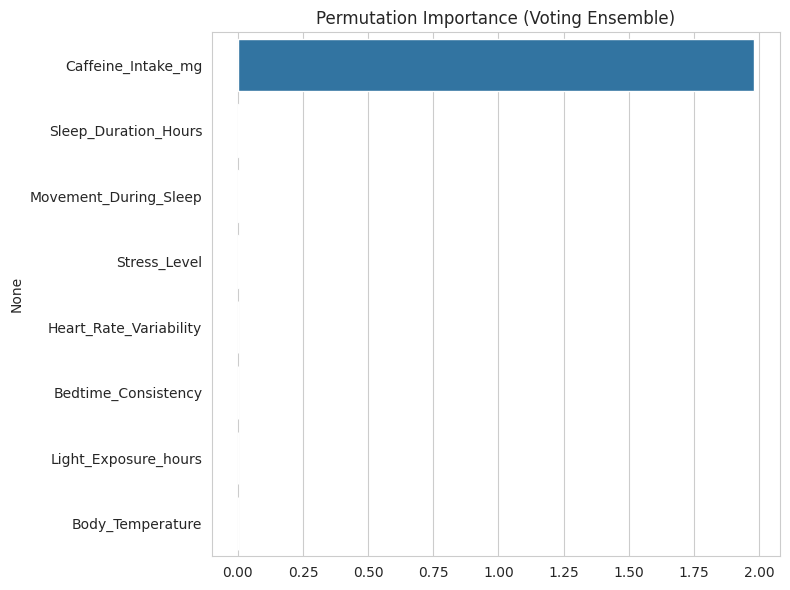


Caffeine Importance (Permutation) = 1.9812

================ STRATEGY A: SAMPLE-WEIGHTED GBR ================

GBR (Sample-Weighted) PERFORMANCE:
R²   : 0.9965385431524637
RMSE : 0.17348947962440217
MAE  : 0.08625647043556152

================ STRATEGY A + TUNED GBR (Sample-Weighted) ================

Fitting 3 folds for each of 243 candidates, totalling 729 fits

BEST PARAMETERS FOUND (Sample-Weighted GBR):
{'learning_rate': 0.05, 'max_depth': 3, 'max_features': None, 'n_estimators': 300, 'subsample': 0.6}

GBR (Sample-Weighted + Tuned) PERFORMANCE:
R²   : 0.9977153843281193
RMSE : 0.14094518995677732
MAE  : 0.07856114975784023


================ FINAL PERFORMANCE COMPARISON ================

Final Performance Comparison:

                                      r2      rmse       mae
Best Single Baseline (Test R²)  0.996447  0.175773  0.083064
Voting Ensemble                 0.995979  0.186993  0.084987
Baseline GBR (Unweighted)       0.996447  0.175773  0.083064
Tuned GBR (Unweighted

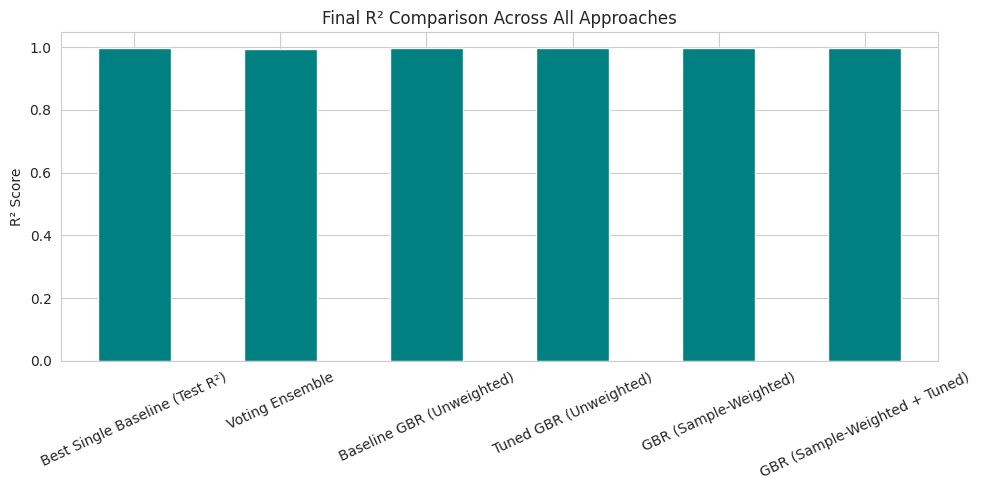



================ MODEL LEADERBOARD (RANKED BY R²) ================

🔥 MODEL LEADERBOARD (BEST → WORST):

1. GBR (Sample-Weighted + Tuned)  —  R² = 0.9977, RMSE = 0.1409, MAE = 0.0786
2. Tuned GBR (Unweighted)  —  R² = 0.9972, RMSE = 0.1558, MAE = 0.0773
3. GBR (Sample-Weighted)  —  R² = 0.9965, RMSE = 0.1735, MAE = 0.0863
4. Best Single Baseline (Test R²)  —  R² = 0.9964, RMSE = 0.1758, MAE = 0.0831
5. Baseline GBR (Unweighted)  —  R² = 0.9964, RMSE = 0.1758, MAE = 0.0831
6. Voting Ensemble  —  R² = 0.9960, RMSE = 0.1870, MAE = 0.0850

Top performer: GBR (Sample-Weighted + Tuned)


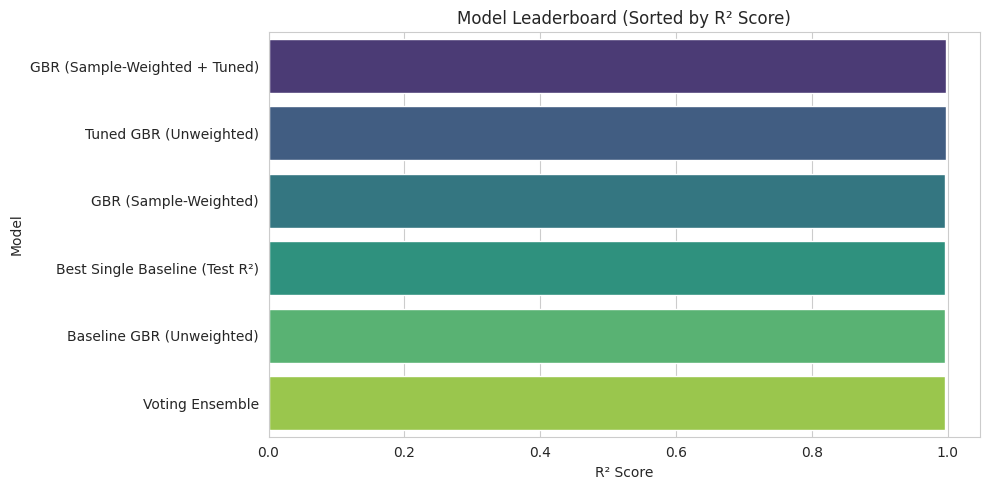


🎉 All Processes Completed Successfully!


In [6]:
# ======================================================================
# 📌 1. IMPORT LIBRARIES
# ======================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error, r2_score, mean_absolute_error
)

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

from google.colab import files
import io


# ======================================================================
# 📌 2. LOAD DATASET
# ======================================================================

uploaded = files.upload()
filename = list(uploaded.keys())[0]
print(f"\n File '{filename}' uploaded successfully!")

df = pd.read_csv(io.BytesIO(uploaded[filename]))
print("\nDataset Loaded Successfully")
print(df.head())


# ======================================================================
# 📌 3. DETECT CAFFEINE COLUMN
# ======================================================================

caff_col = None
for c in df.columns:
    if "caff" in c.lower() or "caffeine" in c.lower():
        caff_col = c
        break

print(f"\nDetected caffeine column: {caff_col}")


# ======================================================================
# 📌 4. FEATURE DISTRIBUTIONS
# ======================================================================

fig, axes = plt.subplots(3, 3, figsize=(18, 10))
fig.suptitle('Feature Distributions', fontsize=16, fontweight='bold')

for idx, col in enumerate(df.columns):
    row = idx // 3
    col_idx = idx % 3
    if row < 3:
        axes[row, col_idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
        axes[row, col_idx].set_title(col, fontweight='bold')

plt.tight_layout()
plt.show()


# ======================================================================
# 📌 5. CORRELATION HEATMAP
# ======================================================================

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


# ======================================================================
# 📌 6. TRAIN-TEST SPLIT + SCALING
# ======================================================================

TARGET = 'Sleep_Quality_Score'
X = df.drop(TARGET, axis=1)
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTrain shape: {X_train.shape}, Test shape: {X_test.shape}")


# ======================================================================
# 📌 7. MODEL TRAINING & COMPARISON (BASELINE MODELS)
# ======================================================================

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='rbf'),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}
predictions = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    model.fit(X_train_scaled, y_train)

    y_pred_train = model.predict(X_train_scaled)
    y_pred_test  = model.predict(X_test_scaled)

    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

    results[name] = {
        'model': model,
        'train_r2': r2_score(y_train, y_pred_train),
        'test_r2': r2_score(y_test, y_pred_test),
        'train_rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'train_mae': mean_absolute_error(y_train, y_pred_train),
        'test_mae': mean_absolute_error(y_test, y_pred_test),
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }

    predictions[name] = y_pred_test


comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train R²': [results[m]['train_r2'] for m in results],
    'Test R²': [results[m]['test_r2'] for m in results],
    'Train RMSE': [results[m]['train_rmse'] for m in results],
    'Test RMSE': [results[m]['test_rmse'] for m in results],
    'Train MAE': [results[m]['train_mae'] for m in results],
    'Test MAE': [results[m]['test_mae'] for m in results],
    'CV R² Mean': [results[m]['cv_mean'] for m in results],
    'CV R² Std': [results[m]['cv_std'] for m in results]
}).sort_values('Test R²', ascending=False)

print("\n================ MODEL COMPARISON TABLE ================")
print(comparison_df.to_string(index=False))

best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
print(f"\nBEST SINGLE BASELINE MODEL (by Test R²): {best_model_name}")


# ======================================================================
# 📌 8. VOTING REGRESSOR (BASELINE ENSEMBLE)
# ======================================================================

voting_model = VotingRegressor([
    ('gbr', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42, verbosity=0)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

voting_model.fit(X_train_scaled, y_train)
y_pred_voting = voting_model.predict(X_test_scaled)

voting_metrics = {
    "r2": r2_score(y_test, y_pred_voting),
    "rmse": np.sqrt(mean_squared_error(y_test, y_pred_voting)),
    "mae": mean_absolute_error(y_test, y_pred_voting)
}

print("\nVOTING REGRESSOR PERFORMANCE:")
print("R²   :", voting_metrics["r2"])
print("RMSE :", voting_metrics["rmse"])
print("MAE  :", voting_metrics["mae"])


# ======================================================================
# 📌 9. BASELINE GBR (UNWEIGHTED) + HYPERPARAMETER TUNING
# ======================================================================

# ---- Baseline GBR (unweighted, unscaled X) ----
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
pred_base = gbr.predict(X_test)

baseline_gbr_results = {
    "r2": r2_score(y_test, pred_base),
    "rmse": np.sqrt(mean_squared_error(y_test, pred_base)),
    "mae": mean_absolute_error(y_test, pred_base)
}

print("\nBASELINE GBR PERFORMANCE (unscaled X):")
print("R²   :", baseline_gbr_results["r2"])
print("RMSE :", baseline_gbr_results["rmse"])
print("MAE  :", baseline_gbr_results["mae"])

# ---- Hyperparameter tuning for unweighted GBR ----
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4, 5],
    'subsample': [0.7, 0.8, 1.0]
}

grid_gbr = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid_gbr,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_gbr.fit(X_train, y_train)
print("\nBEST PARAMETERS FOUND (Unweighted GBR):", grid_gbr.best_params_)

best_gbr = grid_gbr.best_estimator_
pred_tuned = best_gbr.predict(X_test)

tuned_gbr_results = {
    "r2": r2_score(y_test, pred_tuned),
    "rmse": np.sqrt(mean_squared_error(y_test, pred_tuned)),
    "mae": mean_absolute_error(y_test, pred_tuned)
}

print("\nTUNED GBR PERFORMANCE (Unweighted):")
print("R²   :", tuned_gbr_results["r2"])
print("RMSE :", tuned_gbr_results["rmse"])
print("MAE  :", tuned_gbr_results["mae"])


# ======================================================================
# 📌 10. CLEAN VISUAL DIAGNOSTICS (BASED ON TUNED GBR)
# ======================================================================

print("\n\n================ VISUAL DIAGNOSTICS (TUNED GBR) ================\n")

# ---- Correlation Matrix ----
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "-"*90 + "\n")

# ---- Pairplot ----
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
sns.pairplot(df[numeric_cols], corner=True, diag_kind="kde")
plt.suptitle("Pairplot (Numeric Features)", y=1.02, fontsize=16)
plt.show()

print("\n" + "-"*90 + "\n")

# ---- Feature Importance (tuned unweighted GBR) ----
plt.figure(figsize=(10,6))
sns.barplot(x=best_gbr.feature_importances_, y=X.columns, palette="viridis")
plt.title("Feature Importance (Tuned GBR - Unweighted)", fontsize=14)
plt.tight_layout()
plt.show()

print("\n" + "-"*90 + "\n")

# ---- Actual vs Predicted (tuned GBR) ----
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=pred_tuned, s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted (Tuned GBR - Unweighted)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.tight_layout()
plt.show()

print("\n" + "-"*90 + "\n")

# ---- Residual Distribution (tuned GBR) ----
residuals = y_test - pred_tuned
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residual Distribution (Tuned GBR - Unweighted)")
plt.tight_layout()
plt.show()

print("\n" + "-"*90 + "\n")

# ---- Residuals vs Predictions (tuned GBR) ----
plt.figure(figsize=(10,6))
sns.scatterplot(x=pred_tuned, y=residuals, s=60)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted (Tuned GBR - Unweighted)")
plt.tight_layout()
plt.show()

print("\n" + "-"*90 + "\n")

# ---- Outlier Boxplot ----
plt.figure(figsize=(14,6))
sns.boxplot(data=df.select_dtypes(include='number'), palette="Set3")
plt.xticks(rotation=35)
plt.title("Outlier Detection (Numeric Features)")
plt.tight_layout()
plt.show()

print("\n" + "-"*90 + "\n")


# ======================================================================
# 📌 11. PERMUTATION IMPORTANCE (VOTING MODEL) + CAFFEINE IMPORTANCE
# ======================================================================

print("\n================ PERMUTATION IMPORTANCE (VOTING ENSEMBLE) ================\n")

perm = permutation_importance(voting_model, X_test_scaled, y_test, n_repeats=20, random_state=42)
perm_ser = pd.Series(perm.importances_mean, index=X_train.columns).sort_values(ascending=False)

print("Top Features (Permutation Importance - Voting):\n")
print(perm_ser.head(12))

plt.figure(figsize=(8,6))
sns.barplot(x=perm_ser.values[:12], y=perm_ser.index[:12])
plt.title("Permutation Importance (Voting Ensemble)")
plt.tight_layout()
plt.show()

if caff_col in perm_ser.index:
    print(f"\nCaffeine Importance (Permutation) = {perm_ser[caff_col]:.4f}")
else:
    print("\nCaffeine column not found in permutation importance index.")


# ======================================================================
# 📌 12. STRATEGY A — SAMPLE WEIGHTED GBR (CAFFEINE-AWARE)
# ======================================================================

print("\n================ STRATEGY A: SAMPLE-WEIGHTED GBR ================\n")

if caff_col is None:
    print("No caffeine column detected → Strategy A skipped.")
    sw_results = {"r2": np.nan, "rmse": np.nan, "mae": np.nan}
    sw_tuned_results = {"r2": np.nan, "rmse": np.nan, "mae": np.nan}
else:
    # compute sample weights (on TRAIN only)
    c_vals = X_train[caff_col].astype(float).values
    c_norm = (c_vals - c_vals.min()) / (c_vals.max() - c_vals.min() + 1e-9)

    alpha = 2.0  # strength of downweighting
    sample_weights = 1 / (1 + alpha * c_norm)

    gbr_sw = GradientBoostingRegressor(random_state=42)
    gbr_sw.fit(X_train_scaled, y_train, sample_weight=sample_weights)
    y_pred_sw = gbr_sw.predict(X_test_scaled)

    sw_results = {
        "r2": r2_score(y_test, y_pred_sw),
        "rmse": np.sqrt(mean_squared_error(y_test, y_pred_sw)),
        "mae": mean_absolute_error(y_test, y_pred_sw)
    }

    print("GBR (Sample-Weighted) PERFORMANCE:")
    print("R²   :", sw_results["r2"])
    print("RMSE :", sw_results["rmse"])
    print("MAE  :", sw_results["mae"])


    # ==================================================================
    # 📌 13. STRATEGY A + TUNED GBR (Sample-weighted Hyperparameter Tuning)
    # ==================================================================

    print("\n================ STRATEGY A + TUNED GBR (Sample-Weighted) ================\n")

    param_grid_sw = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [2, 3, 4],
        'subsample': [0.6, 0.8, 1.0],
        'max_features': [None, 0.7, 0.5]
    }

    grid_sw = GridSearchCV(
        estimator=GradientBoostingRegressor(random_state=42),
        param_grid=param_grid_sw,
        scoring='r2',
        cv=3,
        n_jobs=-1,
        verbose=1
    )

    grid_sw.fit(X_train_scaled, y_train, sample_weight=sample_weights)

    print("\nBEST PARAMETERS FOUND (Sample-Weighted GBR):")
    print(grid_sw.best_params_)

    best_sw_tuned = grid_sw.best_estimator_
    y_pred_sw_tuned = best_sw_tuned.predict(X_test_scaled)

    sw_tuned_results = {
        "r2": r2_score(y_test, y_pred_sw_tuned),
        "rmse": np.sqrt(mean_squared_error(y_test, y_pred_sw_tuned)),
        "mae": mean_absolute_error(y_test, y_pred_sw_tuned)
    }

    print("\nGBR (Sample-Weighted + Tuned) PERFORMANCE:")
    print("R²   :", sw_tuned_results["r2"])
    print("RMSE :", sw_tuned_results["rmse"])
    print("MAE  :", sw_tuned_results["mae"])


# ======================================================================
# 📌 14. FINAL COMPARISON TABLE (ALL APPROACHES)
# ======================================================================

print("\n\n================ FINAL PERFORMANCE COMPARISON ================\n")

# Best single baseline by test R²
best_single_row = comparison_df.iloc[0]
best_single_metrics = {
    "r2": best_single_row['Test R²'],
    "rmse": best_single_row['Test RMSE'],
    "mae": best_single_row['Test MAE']
}

final_comp = pd.DataFrame({
    "Best Single Baseline (Test R²)": best_single_metrics,
    "Voting Ensemble": voting_metrics,
    "Baseline GBR (Unweighted)": baseline_gbr_results,
    "Tuned GBR (Unweighted)": tuned_gbr_results,
    "GBR (Sample-Weighted)": sw_results,
    "GBR (Sample-Weighted + Tuned)": sw_tuned_results
}).T

print("Final Performance Comparison:\n")
print(final_comp)

plt.figure(figsize=(10,5))
final_comp['r2'].plot(kind='bar', color='teal')
plt.title("Final R² Comparison Across All Approaches")
plt.ylabel("R² Score")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()


# ======================================================================
# 📌 15. MODEL LEADERBOARD (RANKED BY R²)
# ======================================================================

print("\n\n================ MODEL LEADERBOARD (RANKED BY R²) ================\n")

leaderboard = final_comp.sort_values("r2", ascending=False)

print("🔥 MODEL LEADERBOARD (BEST → WORST):\n")
for i, (model_name, row) in enumerate(leaderboard.iterrows(), start=1):
    print(f"{i}. {model_name}  —  R² = {row['r2']:.4f}, RMSE = {row['rmse']:.4f}, MAE = {row['mae']:.4f}")

print(f"\nTop performer: {leaderboard.index[0]}")

plt.figure(figsize=(10,5))
sns.barplot(x=leaderboard['r2'], y=leaderboard.index, palette="viridis")
plt.title("Model Leaderboard (Sorted by R² Score)")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

print("\n🎉 All Processes Completed Successfully!")
